In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5628,5629,15665168,Calabrese,681,Germany,Female,44,3,105206.70,2,1,1,163558.36,0
6670,6671,15667932,Bellucci,758,Spain,Female,43,10,0.00,2,1,1,55313.44,0
1397,1398,15754796,Byrne,487,Germany,Female,46,4,135070.58,2,1,1,44244.49,1
7679,7680,15790689,Hibbins,647,Spain,Male,32,9,80958.36,1,1,1,128590.73,0
5134,5135,15641604,Frolova,850,France,Female,55,10,98488.08,1,1,0,155879.57,1


# Data Cleaning

# Data Exploration

In [ ]:
# RowNumber, CustomerId and Surname is useless [when building ML model]
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [ ]:
df.dtypes # All columns along with their types

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Visualization

In [ ]:
# Tenure => How loyal your customer is, How many of loyal customers leaving
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

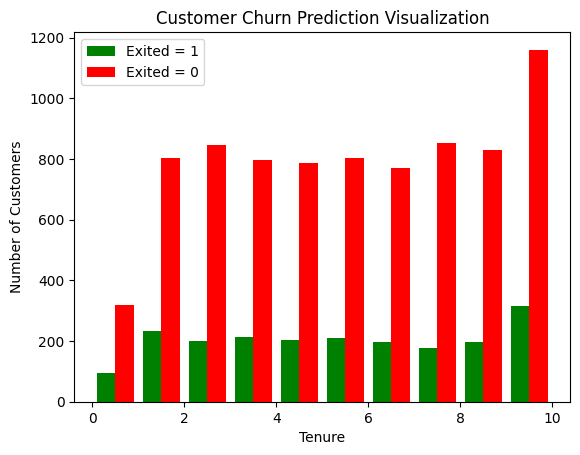

In [ ]:
# Plotting the histogram with persons leaving and staying in the service
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green','red'], label = ['Exited = 1','Exited = 0'])
plt.legend()

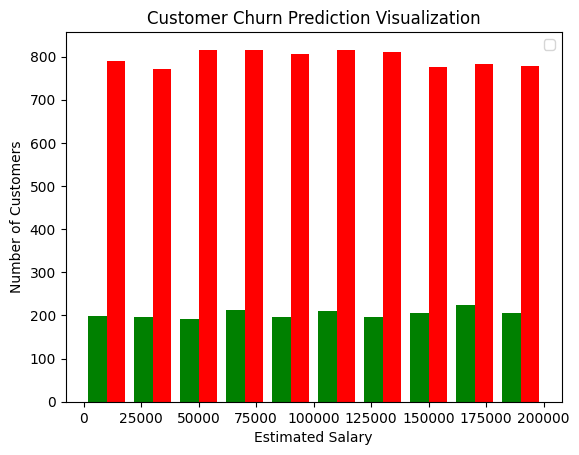

In [ ]:
# Estimated Salary is high customers may leave
es_churn_no = df[df.Exited==0].EstimatedSalary
es_churn_yes = df[df.Exited==1].EstimatedSalary

# Plotting the histogram with persons leaving and staying in the service
plt.xlabel('Estimated Salary')
plt.ylabel('Number of Customers')
plt.title("Customer Churn Prediction Visualization")

plt.hist([es_churn_yes, es_churn_no], color = ['green','red'])
plt.legend()

In [ ]:
# Exited = 1 [Leaving] (Green in graph)
# Exited = 0 [Not Leaving] (Red in graph)

# Label Encoding

In [ ]:
# Unique values in each of the column
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object': # Checking the column is categorical
            print(f'{column} : {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [ ]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [ ]:
df['Gender'].unique()

array([1, 0])

In [ ]:
# One Hot Encoding
# Create dummy variables and create columns
df1 = pd.get_dummies(data = df, columns = ['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
df1.sample(4)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2775,850,0,51,3,109799.55,2,1,1,12457.76,1,0,0,1
984,773,0,25,1,124532.78,2,0,1,11723.57,0,1,0,0
7245,702,1,36,2,105264.88,2,1,1,52909.87,0,0,1,0
722,669,0,23,1,0.00,2,0,0,66088.83,0,1,0,0


In [ ]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

# Feature Scaling

In [ ]:
# CreditScore, Balance, Tenure and EstimatedSalary are in different ranges
# Scale the values so that it comes to 0 to 1

cols_to_scale = ['CreditScore', 'Balance', 'Tenure', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
df1.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4106,0.642,0,34,1.0,0.611244,1,1,0,0.702558,0,0,0,1
7767,0.422,1,49,0.1,0.406640,1,1,0,0.665264,1,0,1,0
3286,0.656,1,31,0.1,0.000000,2,0,1,0.652238,0,1,0,0


In [ ]:
for col in df1:
  print(f'{col} : {df1[col].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

# Train Test Split

In [ ]:
X = df1.drop('Exited', axis = 'columns')
y = df1['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
X_test.shape

(2000, 12)

In [ ]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7389,0.634,1,34,0.5,0.000000,2,1,0,0.819174,0,0,1
9275,0.154,0,42,0.1,0.301642,1,1,1,0.285459,0,1,0
2995,0.370,1,29,0.2,0.447860,1,1,0,0.928185,1,0,0
5316,0.608,0,40,0.5,0.421221,1,1,0,0.868110,0,0,1
356,1.000,1,57,0.8,0.505290,2,1,1,0.661498,0,0,1
49,0.852,1,37,0.2,0.413591,2,1,0,0.970530,0,1,0
7931,0.914,0,47,0.1,0.379120,1,0,0,0.639379,1,0,0
1523,0.496,0,41,0.8,0.000000,2,1,1,0.809792,0,0,1
7552,0.572,0,76,0.9,0.504327,1,1,1,0.198909,0,0,1
496,0.544,1,32,0.6,0.673936,2,1,0,0.505280,1,0,0


In [ ]:
len(X_train.columns)

12

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    # Input layer, No of neurons => No of columns (12)
    # Each neuron in the input layer is accepting one feature
    # First layer (Hidden layer)
    keras.layers.Dense(7, input_shape = (12,), activation = 'relu'),
    # Output layer
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compilation of model
# Loss => Binarycrossentropy because our output is binary (0/1)
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5796 - accuracy: 0.7958
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 987us/step - loss: 0.5215 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 976us/step - loss: 0.4699 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 0s 962us/step - loss: 0.4634 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 0s 942us/step - loss: 0.4566 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4544 

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 902us/step - loss: 0.4261 - accuracy: 0.8075


[0.42612993717193604, 0.8075000047683716]

In [ ]:
# Predict the model [Testing]
yp = model.predict(X_test)
# As it is sigmoid function the values are between 0 and 1
yp[:5]

63/63 [==============================] - 0s 779us/step


array([[0.24523094],
       [0.36726755],
       [0.19303305],
       [0.0935061 ],
       [0.16804732]], dtype=float32)

In [ ]:
y_test[:10]

9394    0
898     1
2398    0
5906    0
2343    0
8225    1
5506    0
6451    0
2670    1
3497    1
Name: Exited, dtype: int64

In [ ]:
# Converting values of yp to 0 or 1
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 1, 1]

In [ ]:
# Statistics on precision and recall
# Plotting performance of overall model
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88      1595
           1       0.54      0.34      0.42       405

    accuracy                           0.81      2000
   macro avg       0.69      0.63      0.65      2000
weighted avg       0.78      0.81      0.79      2000



Text(95.72222222222221, 0.5, 'Truth')

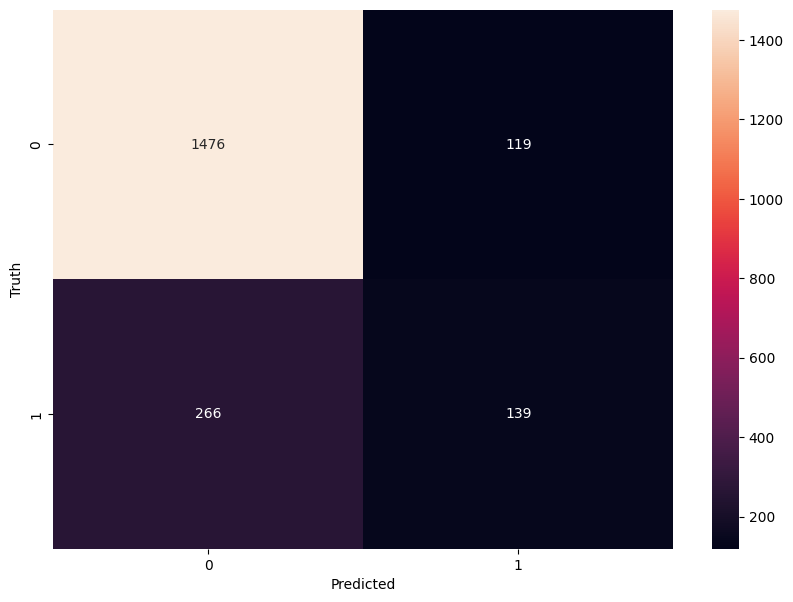

In [ ]:
import seaborn as sns
# Diagonal => Correct prediction, Not in Diagonal => Error
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Accuracy

In [ ]:
round((1561+67)/(1561+67+338+34),2)

0.81

# Precision for 0 class. i.e. Precision for customers who did not churn

In [ ]:
# No of correct predictions you made for 0
# (Correctly predicted 0) / (Total predicted 0)
round(1561/(1561+338),2)

0.82

# Precision for 1 class. i.e. Precision for customers who actually churned

In [ ]:
# No of correct predictions you made for 1
# (Correctly predicted 1) / (Total predicted 1)
round(67/(67+34),2)

0.66

# Recall for 0 class

In [ ]:
# Total correct prediction for 0 / Total actual 0 samples
round(1561/(1561+34))

1

# Recall for 1 class

In [ ]:
# Total correct prediction for 1 / Total actual 1 samples
round(67/(338+67),2)

0.17